In [31]:
%env CUDA_LAUNCH_BLOCKING=1
%load_ext autoreload
%autoreload complete
# %aimport ...

import sys
import importlib
import warnings

importlib.invalidate_caches()

for mod_name in list(sys.modules):
    if not (str.startswith(mod_name, "robotodo") or str.startswith(mod_name, "tensorspecs")):
        continue
    try:
        importlib.reload(sys.modules[mod_name])
    except Exception as error:
        warnings.warn(f"{error}")


env: CUDA_LAUNCH_BLOCKING=1
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from robotodo.engines.isaac._kernel import Kernel

kernel = Kernel([
    "--/log/file=/tmp/todo-isaacsim.log",
    # "--/log/enableStandardStreamOutput=true",
    "--/app/enableStdoutOutput=true",
    # "--no-window",
    # TODO
    # "--/app/content/emptyStageOnStart=false",
    # "--/app/asyncRendering=true",
    # "--enable", "isaacsim.exp.full",
    "--/app/vulkan=",
], kit_path="isaacsim.exp.full.kit")
kernel.start_app_loop_soon()

[Warning] [simulation_app] Interactive python shell detected but ISAAC_JUPYTER_KERNEL was not set. Problems with asyncio may occur
[Warning] [simulation_app] Please use Isaac Sim Python 3 kernel instead of the default Python 3 Kernel
Loading user config located at: '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/user.config.json'
[0.072s] [ext: omni.kit.async_engine-0.0.3] startup
[0.289s] [ext: omni.metrics.core-0.0.3] startup
[0.290s] [ext: omni.client.lib-1.1.0] startup
[0.310s] [ext: omni.blobkey-1.1.2] startup
[0.310s] [ext: omni.stats-1.0.1] startup
[0.311s] [ext: omni.datastore-0.0.0] startup
[0.317s] [ext: omni.client-1.3.0] startup
[0.374s] [ext: omni.ujitso.default-1.0.0] startup
[0.384s] [ext: omni.hsscclient-1.1.2] startup
[0.392s] [ext: omni.gpu_foundation.shadercache.vulkan-1.0.0] startup
[0.406s] [ext: omni.assets.plugins-0.0.0] startup
[0.416s] [ext: omni.gpu_foundation-0.0.0] startup


2025-10-13T11:33:06Z s] [Error] [omni.gpu_foundation_factory.plugin] Start up failed. The default graphics plugin cannot be set!


[0.530s] [ext: carb.windowing.plugins-1.0.0] startup
[0.542s] [ext: omni.kit.renderer.init-0.0.0] startup

|---------------------------------------------------------------------------------------------|
| Driver Version: 535.247.01    | Graphics API: Vulkan
|=============================================================================================|
| GPU | Name                             | Active | LDA | GPU Memory | Vendor-ID | LUID       |
|     |                                  |        |     |            | Device-ID | UUID       |
|     |                                  |        |     |            | Bus-ID    |            |
|---------------------------------------------------------------------------------------------|
| 0   | NVIDIA GeForce RTX 3060          | Yes: 0 |     | 12288   MB | 10de      | 0          |
|     |                                  |        |     |            | 2504      | 3157457f.. |
|     |                                  |        |     |            |

2025-10-13T11:33:21Z [15,698ms] [Error] [isaacsim.ros2.bridge.impl.extension] ROS2 Bridge startup failed


[16.435s] [ext: omni.kit.registry.nucleus-0.0.0] startup
[16.778s] app ready


2025-10-13T11:33:22Z [16,847ms] [Error] [carb.graphics-vulkan.plugin] Could not get NGX parameters block because NGX isn't enabled.
2025-10-13T11:33:22Z [16,847ms] [Error] [carb.graphics-vulkan.plugin] Failed to create NGX context.
2025-10-13T11:33:23Z [16,964ms] [Error] [rtx.optixdenoising73.plugin] Failed to create an Optix adaptor for device 0


In [3]:
# TODO 
from robotodo.engines.isaac.builder import load_usd_scene

# TODO set up axis
scene = await load_usd_scene(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/default_environment.usd",
    # "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Environments/Grid/gridroom_black.usd",
    _kernel=kernel,
)

In [4]:
from robotodo.engines.isaac.scene import Scene
from robotodo.engines.isaac.builder import load_urdf, load_usd, build_camera
from robotodo.utils.pose import Pose


# scene = Scene(_kernel=kernel)


panda = await load_urdf(
    "./todo-curobo-sample-configs/franka/franka_description/franka_panda.urdf", 
    scene=scene, 
    fix_root_link=True,
)


mug = await load_usd(
    "https://omniverse-content-production.s3-us-west-2.amazonaws.com/Assets/Isaac/5.0/Isaac/Props/Mugs/SM_Mug_A2.usd",
    scene=scene,
)

mug.collidable = True
mug.rigid_body.enabled = True
mug.pose = Pose(p=[.5, .5, .5])



2025-10-13T11:33:25Z [19,290ms] [Error] [omni.usd] Runtime Error: in Create at line 46 of /builds/omniverse/usd-ci/USD/pxr/usd/ar/filesystemWritableAsset.cpp -- Could not create directory '/configuration/' for asset '/configuration/anon:0x418d9cf0:tmp_sensor.usd'

2025-10-13T11:33:25Z [19,290ms] [Error] [omni.usd] Runtime Error: in StartPacking at line 2462 of /builds/omniverse/usd-ci/USD/pxr/usd/usd/crateFile.cpp -- Unable to open /configuration/anon:0x418d9cf0:tmp_sensor.usd for write

2025-10-13T11:33:25Z [19,291ms] [Error] [omni.usd] Runtime Error: in Create at line 46 of /builds/omniverse/usd-ci/USD/pxr/usd/ar/filesystemWritableAsset.cpp -- Could not create directory '/configuration/' for asset '/configuration/anon:0x418d9cf0:tmp_physics.usd'

2025-10-13T11:33:25Z [19,291ms] [Error] [omni.usd] Runtime Error: in StartPacking at line 2462 of /builds/omniverse/usd-ci/USD/pxr/usd/usd/crateFile.cpp -- Unable to open /configuration/anon:0x418d9cf0:tmp_physics.usd for write

2025-10-13T1

In [5]:
cam = await build_camera(scene=scene)
cam.pose = Pose.from_lookat([1, 1, 1], p_target=[0, 0, 0])


In [8]:
mug.pose.p

array([[0.5, 0.5, 0.5]])

In [9]:
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=[0, 0, 0])
# cam.pose = Pose.from_lookat([1, 1, 1], p_target=panda.link_poses[..., -1].p)
cam.pose = Pose.from_lookat([1, 1, 1], p_target=mug.pose.p)

In [10]:
mug.pose

Pose(p=array([[0.5, 0.5, 0.5]]), q=array([[0., 0., 0., 1.]]))

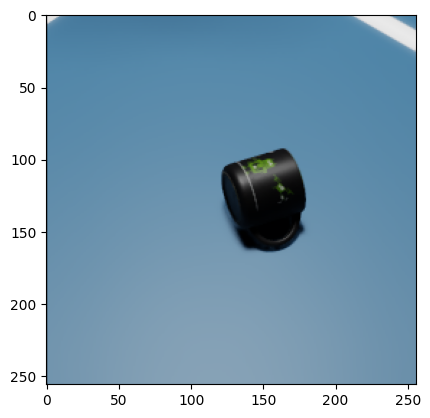

In [35]:
import matplotlib.pyplot as plt

cam.pose = Pose.from_lookat([1, 1, 1], p_target=mug.pose.p)

data = await cam.read_rgba()

plt.imshow(data[0].cpu())


In [151]:
import omni.replicator.core as rep

await rep.orchestrator.step_async()

In [153]:
rep.orchestrator.step_async?

Signature:
rep.orchestrator.step_async(
    rt_subframes: int = -1,
    pause_timeline: bool = True,
    delta_time: float = None,
    wait_for_render: bool = True,
) -> None
Docstring:
Step one frame

If Replicator is not yet started, an initialization step is first taken to ensure the necessary settings are set
for data capture. The renderer will then render as many subframes as required by current settings and schedule a
frame to be captured by any active annotators and writers.

Args:
    rt_subframes: Specify the number of subframes to render. During subframe generation, the simulation is paused.
        This is often beneficial when large scene changes occur to reduce rendering artifacts or to allow materials
        to fully load. This setting is enabled for both RTX Real-Time and Path Tracing render modes. Values must be
        greater than ``0``.
    pause_timeline: If ``True``, pause timeline after step. Defaults to ``True``.
    delta_time: The amount of time that timeline 

In [236]:
import omni.replicator.core as rep

await rep.orchestrator.step_async(rt_subframes=1, delta_time=0, wait_for_render=False)


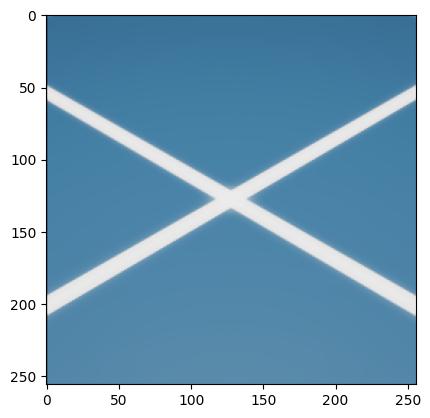

In [240]:
import matplotlib.pyplot as plt

plt.imshow(cam.read_rgba()[0].cpu())

In [105]:
await scene.step()

In [50]:
s = kernel.get_settings()
s.get_settings_dictionary()["app"]

{'portableMode': True,
 'omniverse': {'defaultServer': 'localhost:3009',
  'showPwdField': False,
  'showLoginOnStart': False,
  'autoLoginOnStart': False},
 'userConfigPath': '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/user.config.json',
 'profileFromStart': False,
 'uploadDumpsOnStartup': False,
 'name': 'Isaac-Sim Full',
 'version': '5.0.0',
 'file': {'browserIconSize': 60, 'ignoreUnsavedOnExit': False},
 'vulkan': True,
 'enableDeveloperWarnings': False,
 'disableCmdArgs': False,
 'profilerBackend': 'mux',
 'versionFile': '',
 'enableStdoutOutput': True,
 'installSignalHandlers': False,
 'python': {'sysPaths': ('/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/kernel/py',
   '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/plugins/bindings-python'),
  'extraPaths': {},
  'scriptFolders': ('/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-packages/omni/scripts',
   '/home/sysadmin/Do

In [79]:
import omni

omni.syntheticdata?

Type:        module
String form: <module 'omni.syntheticdata' from '/home/sysadmin/lab/robotodo/.conda/lib/python3.11/site-package <...>  Full/5.0/exts/3/omni.syntheticdata-0.6.13+8131b85d.lx64.r.cp311/omni/syntheticdata/__init__.py'>
File:        ~/lab/robotodo/.conda/lib/python3.11/site-packages/omni/data/Kit/Isaac-Sim Full/5.0/exts/3/omni.syntheticdata-0.6.13+8131b85d.lx64.r.cp311/omni/syntheticdata/__init__.py
Docstring:   <no docstring>

In [113]:
cam._isaac_get_render_annotator?

Signature:
cam._isaac_get_render_annotator(
    name: Union[Literal['rgb', 'distance_to_image_plane'], str],
    resolution: robotodo.engines.isaac.sensors.Camera.Resolution,
    device: str = 'cuda',
    copy: bool = False,
)
Docstring:
TODO doc

omni.replicator.core.AnnotatorRegistry.get_registered_annotators()
File:      ~/lab/robotodo/packages/robotodo/engines/isaac/sensors.py
Type:      method

In [114]:
cam._isaac_get_render_annotator("rgb", (256, 256))

In [154]:
import omni

omni.replicator.core.scripts.annotators.Annotator.get_data?

Signature:
omni.replicator.core.scripts.annotators.Annotator.get_data(
    self,
    device: str = None,
    do_array_copy: bool = False,
    use_legacy_structure: bool = True,
) -> Any
Docstring:
Return annotator data.

Note that if calling `get_data()` immediately after initialization, the annotator output will not yet
be available. Please allow for at least one update.

Args:
    device: Device to hold data in. Select from ``['cpu', 'cuda', 'cuda:<device_index>']``. If ``cpu`` is
        specified, the output data is returned in the form of a numpy array. If ``cuda`` is selected, a Warp
        array is returned. Note that only valid datatypes will be moved to the GPU. Defaults to the device
        specified on annotator initialization.
    do_array_copy: If ``True``, return a copy of the data. This is necessary if the data is expected to persist,
        such as when used in conjunction with asynchronous backends.
    use_legacy_structure: Specifies the output structure to return.

In [188]:
import contextlib

@contextlib.contextmanager
def render_only():
    # settings = kernel.get_settings()
    # play_simulations_orig = settings.get("/app/player/playSimulations")
    # settings.set("/app/player/playSimulations", False)
    yield
    # settings.set("/app/player/playSimulations", play_simulations_orig)

In [190]:
%%timeit -n 100


# settings = kernel.get_settings()
# play_simulations_orig = settings.get("/app/player/playSimulations")
# settings.set("/app/player/playSimulations", False)
# settings.set("/app/player/playSimulations", play_simulations_orig)

with render_only():
    pass

1.15 μs ± 32.5 ns per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [215]:
kernel.start_app_loop_soon()

In [230]:
# %%timeit -n 1

import timeit

start = timeit.default_timer()

await rep.orchestrator.step_async(rt_subframes=1, delta_time=0, wait_for_render=False)

stop = timeit.default_timer()


# cam.read_rgba()
(stop - start)

0.09829787723720074